In [1]:
import keras
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [2]:
gender_labl=pd.read_csv('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/labels.csv',delimiter='\t') #reads the data set containing gender labels

In [3]:
gender_labl=gender_labl['gender'] #extracts only gender label column


In [4]:
from skimage import data
from skimage.color import rgb2gray
import cv2
#using 5 types of haarcascade face detectors
faceDet = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt2.xml")
faceDet_three = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml")
faceDet_four = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt_tree.xml")
faceDet_five=cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_profileface.xml")

In [6]:
for i in tqdm(range(gender_labl.size)): #tqdm is for status bar 
    img = cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img/%d.jpg' %i) #read colour image
    imgg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to greyscale
    #detect faces in image- the image is scaled down by 10% at each step of resizing
    face = faceDet.detectMultiScale(imgg, scaleFactor=1.01, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    face_two = faceDet_two.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    face_three = faceDet_three.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    face_four = faceDet_four.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    face_five = faceDet_five.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    if len(face) == 1:
        facefeatures = face
    elif len(face_two) == 1:
        facefeatures = face_two
    elif len(face_three) == 1:
        facefeatures = face_three
    elif len(face_four) == 1:
        facefeatures = face_four
    elif len(face_five)==1:
        facefeatures = face_five
    else:
        facefeatures = ""
    for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
        #print "face found in file: %s" %f
        imgg = imgg[y:y+h, x:x+w] #Cut the frame to size
        try:
            out = cv2.resize(imgg, (100, 100)) #Resize face so all images have same size
            cv2.imwrite('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train/%d.jpg' %(i), out) #Write image            
        except:
            pass #If error, pass 

100%|██████████| 5000/5000 [20:49<00:00,  4.00it/s]


In [5]:
#histogram equalisation
j=0
yeq=list()
for i in tqdm(range(5000)):
    try:
        image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train/%d.jpg' %(i))
        if image is not None: 
            gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            equ=cv2.equalizeHist(gray_image)
            cv2.imwrite('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train_eq/%d.jpg' %(j), equ)
            j=j+1
            yeq.append(gender_labl[i])
    except:
        pass
    

100%|██████████| 5000/5000 [00:13<00:00, 371.89it/s]


In [9]:
len(yeq)

4950

In [7]:
y=list()
train_image=[]
for i in tqdm(range(5000)):
    try:
        image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train_eq/%d.jpg' %(i))
        if image is not None : 
            gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            pic = np.asarray(gray_image)
            pic1=pic.flatten()
            train_image.append(pic1) #list of grayscale pixel intensities of images
            y.append(yeq[i]) #list of gender labels
            #LBP
            #imgLBP = np.zeros_like(image) 
            #neighboor = 3 #LBP 3x3 scale
            #for ih in range(0,image.shape[0] - neighboor): # range = (0,r-3)
                #for iw in range(0,image.shape[1] - neighboor): #range = (0,c-3)
                    ### Step 1: 3 by 3 pixel
                    #img          = gray_image[ih:ih+neighboor,iw:iw+neighboor] #select each 3x3 window
                    #center       = img[1,1] 
                    #img01        = (img >= center)*1.0 #pixel value = 1 wherever pixel intensity greater than centre pixel
                    #img01_vector = img01.T.flatten() #convert the array to vector
                    # it is ok to order counterclock manner
                    # img01_vector = img01.flatten()
                    ### Step 2: **Binary operation**:
                    #img01_vector = np.delete(img01_vector,4) # delete central value
                    ### Step 3: Decimal: Convert the binary operated values to a digit.
                    #where_img01_vector = np.where(img01_vector)[0] #non zero element positions
                    #if len(where_img01_vector) >= 1:
                        #num = np.sum(2**where_img01_vector)
                    #else:
                        #num = 0
                    #imgLBP[ih+1,iw+1] = num
            #imgLBPf=imgLBP.flatten()
            #train_LBP.append(imgLBPf)
    except:
        pass

100%|██████████| 5000/5000 [00:05<00:00, 835.13it/s]


In [6]:
from skimage.feature import local_binary_pattern
ylbp=list()
train_LBP=[]
radius = 3
n_points = 8 * radius
for i in tqdm(range(5000)):

        image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train_eq/%d.jpg' %(i))
        if image is not None : 
            #LBP
            gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            lbp = local_binary_pattern(gray_image, n_points , radius)
            pic1 = np.asarray(lbp)
            pic1=pic1.flatten()
            train_LBP.append(pic1) #list of grayscale pixel intensities of images
            ylbp.append(yeq[i])
    #except:
        #pass

100%|██████████| 5000/5000 [00:43<00:00, 115.18it/s]


In [7]:
train_hog=[]
from skimage import feature
from skimage import exposure
for i in tqdm(range(5000)):
    image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train_eq/%d.jpg' %(i))
    if image is not None : 
        H=feature.hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),transform_sqrt=True,block_norm='L1')
        #H=np.reshape(H,(1,H.shape[0]))
        train_hog.append(H)
        

100%|██████████| 5000/5000 [00:52<00:00, 95.20it/s] 


In [10]:
len(H)

4356

In [18]:
#only LBP 86%
k=len(train_LBP)
image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train_eq/0.jpg')
m=image.shape[0]*image.shape[1]
X=np.zeros((k,m))
for i in range(k):
    X[i][0:m]=train_LBP[i][0:m]

In [11]:
#LBP+HOG 86.96% on SVM
#88.78% in Log Reg
k=len(train_LBP)
image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img_train_eq/0.jpg')
m=image.shape[0]*image.shape[1]
n=len(train_hog[0])
Xd=np.zeros((k,m+n))
for i in range(k):
    Xd[i][0:m]=train_LBP[i][0:m]
    Xd[i][m:m+n]=train_hog[i][0:n]

In [48]:
#HOG alone
#85.925%
#88.88% in log reg
k=len(train_hog)
n=len(train_hog[0])
Xh=np.zeros((k,n))
for i in range(k):
    Xh[i][0:n]=train_hog[i][0:n]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xd, ylbp, random_state=42, test_size=0.3)



In [13]:
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [14]:
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(.5)
pca.fit(X_train)
pca.n_components_

165

In [19]:
X_train = pca.transform(X_train)
X_test= pca.transform(X_test)

In [29]:
hyper_para=[{'kernel':['rbf'],'gamma':[0.001, 0.01, 0.1, 1, 10 ,100],'C':[0.001, 0.01, 0.1, 1, 10 ,100,1000]}]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=hyper_para,cv=5, n_jobs=-1)
clf.fit(X_train,y_train)
print('Best score:', clf.best_score_) 

KeyboardInterrupt: 

In [25]:
print('Best C:',clf.best_estimator_.C) 
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 10
Best Gamma: 0.001


In [27]:
#SVM classifier 
def SVM(x_train,y_train, x_test):
    model = svm.SVC(C=1,kernel='rbf',gamma=0.001)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred
# Scikit learn library results
y_pred=SVM(X_train,y_train, X_test)
print(accuracy_score(y_test,y_pred))

KeyboardInterrupt: 

In [38]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C=1,kernel='rbf',gamma=0.001), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 10 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))


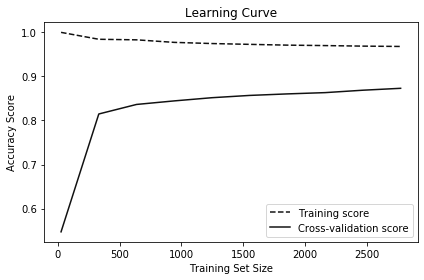

In [39]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [25]:
gender_labl=pd.read_csv('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/labels.csv',delimiter='\t') #reads the data set containing gender labels
gender_labl=gender_labl['gender'] #extracts only gender label column
faceDet = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt2.xml")
faceDet_three = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml")
faceDet_four = cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt_tree.xml")
faceDet_five=cv2.CascadeClassifier("opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_profileface.xml")
for i in tqdm(range(100)): #tqdm is for status bar 
        img = cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/img/%d.jpg' %i) #read colour image
        imgg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to greyscale
        #detect faces in image- the image is scaled down by 10% at each step of resizing
        face = faceDet.detectMultiScale(imgg, scaleFactor=1.01, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        face_two = faceDet_two.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        face_three = faceDet_three.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        face_four = faceDet_four.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        face_five = faceDet_five.detectMultiScale(imgg, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        if len(face) == 1:
            facefeatures = face
        elif len(face_two) == 1:
            facefeatures = face_two
        elif len(face_three) == 1:
            facefeatures = face_three
        elif len(face_four) == 1:
            facefeatures = face_four
        elif len(face_five)==1:
            facefeatures = face_five
        else:
            facefeatures = ""
        for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
            #print "face found in file: %s" %f
            imgg = imgg[y:y+h, x:x+w] #Cut the frame to size
            try:
                out = cv2.resize(imgg, (100, 100)) #Resize face so all images have same size
                cv2.imwrite('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/img_test/%d.jpg' %(i), out) #Write image            
            except:
                pass #If error, pass 
        #histogram equalisation
j=0
yeq=list()


for i in tqdm(range(100)):
    try:
        image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/img_test/%d.jpg' %(i))
        if image is not None: 
            gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            equ=cv2.equalizeHist(gray_image)
            cv2.imwrite('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/img_test_eq/%d.jpg' %(j), equ)
            j=j+1
            yeq.append(gender_labl[i])

                    
    except:
        pass

from skimage.feature import local_binary_pattern
ylbp=list()
train_LBP=[]
radius = 3
n_points = 8 * radius
for i in tqdm(range(100)):

    image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/img_test_eq/%d.jpg' %(i))
    if image is not None : 
                #LBP
        gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        lbp = local_binary_pattern(gray_image, n_points , radius)
        pic1 = np.asarray(lbp)
        pic1=pic1.flatten()
        train_LBP.append(pic1) #list of grayscale pixel intensities of images
        ylbp.append(yeq[i])
        #except:
            #pass

train_hog=[]
from skimage import feature
from skimage import exposure
for i in tqdm(range(100)):
    image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/img_test_eq/%d.jpg' %(i))
    if image is not None : 
        H=feature.hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),transform_sqrt=True,block_norm='L1')
            #H=np.reshape(H,(1,H.shape[0]))
        train_hog.append(H)

    #LBP+HOG 
k=len(train_LBP)
image=cv2.imread('Desktop/MACHINE LEARNING PROJECT/dataset_test_AMLS_19-20/celeba_test/img_test_eq/0.jpg')
m=image.shape[0]*image.shape[1]
n=len(train_hog[0])
Xd=np.zeros((k,m+n))
for i in range(k):
    Xd[i][0:m]=train_LBP[i][0:m]
    Xd[i][m:m+n]=train_hog[i][0:n]

scaler = MinMaxScaler()
X_t = scaler.fit_transform(Xd)
X_test = scaler.transform(Xd)

from sklearn.decomposition import PCA
pca = PCA(.5)
pca.fit(X_test)
pca.n_components_
X_test = pca.transform(X_test)
 

In [28]:
       
model = svm.SVC(C=1,kernel='rbf',gamma=0.001)
y_pred = clf.predict(X_test)
print(accuracy_score(y_lbp,y_pred))

NameError: name 'clf' is not defined

Accuracy on test set: 0.47575757575757577


/Users/aiswarya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on test set: 0.697979797979798


4986